In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
ml=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for i in ml:
    df[i].replace(0,np.nan,inplace=True)
    df[i].fillna(df[i].mean(),inplace=True)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
x=df.iloc[:,1:-1]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [6]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
#standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
# Applying train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model=LogisticRegression(solver='liblinear')

model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(ytest,ypred)

0.7857142857142857

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [15]:
print(f"Actual values     -: {ytest[:25].values}")
print(f"Predicted values  -: {ypred[:25]}")

Actual values     -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values  -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [16]:
model.predict_proba(xtest)

array([[0.5662516 , 0.4337484 ],
       [0.68827677, 0.31172323],
       [0.89781719, 0.10218281],
       [0.92880255, 0.07119745],
       [0.72828301, 0.27171699],
       [0.68288267, 0.31711733],
       [0.6721006 , 0.3278994 ],
       [0.89079954, 0.10920046],
       [0.79546149, 0.20453851],
       [0.72859519, 0.27140481],
       [0.57869293, 0.42130707],
       [0.89177231, 0.10822769],
       [0.0091507 , 0.9908493 ],
       [0.35096357, 0.64903643],
       [0.61226503, 0.38773497],
       [0.32517494, 0.67482506],
       [0.69021279, 0.30978721],
       [0.67237901, 0.32762099],
       [0.9547603 , 0.0452397 ],
       [0.89444048, 0.10555952],
       [0.5620062 , 0.4379938 ],
       [0.88113892, 0.11886108],
       [0.11340854, 0.88659146],
       [0.83353013, 0.16646987],
       [0.91771622, 0.08228378],
       [0.57840663, 0.42159337],
       [0.72976943, 0.27023057],
       [0.3672247 , 0.6327753 ],
       [0.87657196, 0.12342804],
       [0.58038318, 0.41961682],
       [0.

In [17]:
ypredprob=model.predict_proba(xtest)[:,1]

In [18]:
ypredprob

array([0.4337484 , 0.31172323, 0.10218281, 0.07119745, 0.27171699,
       0.31711733, 0.3278994 , 0.10920046, 0.20453851, 0.27140481,
       0.42130707, 0.10822769, 0.9908493 , 0.64903643, 0.38773497,
       0.67482506, 0.30978721, 0.32762099, 0.0452397 , 0.10555952,
       0.4379938 , 0.11886108, 0.88659146, 0.16646987, 0.08228378,
       0.42159337, 0.27023057, 0.6327753 , 0.12342804, 0.41961682,
       0.42228078, 0.10335454, 0.05807206, 0.82273366, 0.16985333,
       0.80779573, 0.09040773, 0.21873668, 0.06677663, 0.47485752,
       0.27984244, 0.10999609, 0.03849095, 0.43660998, 0.08368136,
       0.0219087 , 0.86587848, 0.81584804, 0.07798873, 0.12329222,
       0.04626026, 0.19030743, 0.81342247, 0.05478277, 0.66157101,
       0.11223512, 0.30176153, 0.27715131, 0.62750172, 0.16651339,
       0.67508854, 0.06984846, 0.68736762, 0.27648631, 0.5368627 ,
       0.11966996, 0.48210645, 0.50405518, 0.56362398, 0.6114566 ,
       0.87965695, 0.84055732, 0.54928134, 0.01724734, 0.64362

In [19]:
from sklearn.preprocessing import binarize

In [20]:
ypred=binarize([ypredprob],threshold=0.30)[0] #2D --->1D

In [21]:
ypred

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0.])

In [22]:
print(f"Actual values     -: {ytest[:25].values}")
print(f"Predicted values  -: {ypred[:25].astype(int)}")

Actual values     -: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values  -: [1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0]


In [23]:
from sklearn.metrics import roc_curve

In [24]:
fpr,tpr,thres = roc_curve(ytest,ypredprob)

In [25]:
thres

array([1.9908493 , 0.9908493 , 0.86238415, 0.84055732, 0.75774347,
       0.71687126, 0.686867  , 0.67508854, 0.66157101, 0.65325464,
       0.6327753 , 0.62750172, 0.6114566 , 0.60251852, 0.59256328,
       0.56362398, 0.55945029, 0.54928134, 0.52133058, 0.51007994,
       0.48770811, 0.48660859, 0.48210645, 0.47485752, 0.43660998,
       0.4337484 , 0.42228078, 0.42130707, 0.41754195, 0.36527851,
       0.33409376, 0.31486291, 0.3147655 , 0.31015715, 0.30978721,
       0.30964811, 0.30176153, 0.2922972 , 0.28526533, 0.27023057,
       0.26855947, 0.22287312, 0.22257493, 0.19030743, 0.18365286,
       0.18295074, 0.17921119, 0.16651339, 0.16646987, 0.12342804,
       0.12329222, 0.11966996, 0.11886108, 0.01724734])

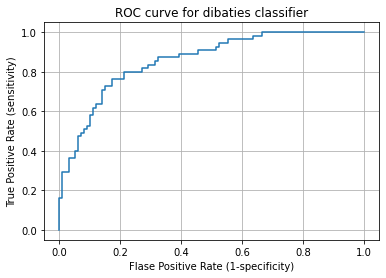

In [26]:
plt.plot(fpr,tpr)
plt.title("ROC curve for dibaties classifier")
plt.xlabel("Flase Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (sensitivity)")
plt.grid(True)
plt.show()

In [28]:
params = [ ['lbfgs','l2'],['lbfgs','none'],
           ['liblinear','l1'],['liblinear','l2'],
           ['newton-cg','l2'],['newton-cg','none'],
           ['sag','l2'],['sag','none'],
           ['saga','l1'],['saga','l2'],['saga','none']  ]

#  ['saga','elasticnet']  --->  Need to perform Scalling on the Data 

all_combinations = []

for i in params:

    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(solver=i[0] , penalty=i[1])

    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(ytest,ypred)
    
    print(f"{i} ---> {acc} ")
    
    all_combinations.append([i[0],i[1],acc])

['lbfgs', 'l2'] ---> 0.7857142857142857 
['lbfgs', 'none'] ---> 0.7857142857142857 
['liblinear', 'l1'] ---> 0.7857142857142857 
['liblinear', 'l2'] ---> 0.7857142857142857 
['newton-cg', 'l2'] ---> 0.7857142857142857 
['newton-cg', 'none'] ---> 0.7857142857142857 
['sag', 'l2'] ---> 0.7857142857142857 
['sag', 'none'] ---> 0.7857142857142857 
['saga', 'l1'] ---> 0.7792207792207793 
['saga', 'l2'] ---> 0.7857142857142857 
['saga', 'none'] ---> 0.7857142857142857 
